## Digítos

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
%matplotlib inline 

In [2]:
#Decompõe os dados 
from sklearn.decomposition import PCA
#escalar dados para trabalhar com  PCA
from sklearn.preprocessing import StandardScaler
#importar datasets embutidos no sklearn
from sklearn import datasets

In [3]:
digitos = datasets.load_digits()

In [4]:
x = digitos['data']
y = digitos['target']

In [5]:
x.shape,y.shape #saída 64 colunas 

((1797, 64), (1797,))

In [6]:
#normalizar colocar os valoresem um padrão
x = StandardScaler().fit_transform(x)

In [7]:
#implementar o PCA
#diminuir para duas dimensões
pca = PCA(n_components=2)

In [8]:
# adequar o x para duas dimensões
x_reduzido = pca.fit_transform(x)

In [9]:
#Duas dimensões (colunas) que carregam as informações das 4 (quatro) colunas 
x_reduzido.shape

(1797, 2)

In [10]:
#mostrar a quantidade de dimensões
print(f"Projetando {x.shape[1]} em apenas 2 dimensões")

Projetando 64 em apenas 2 dimensões


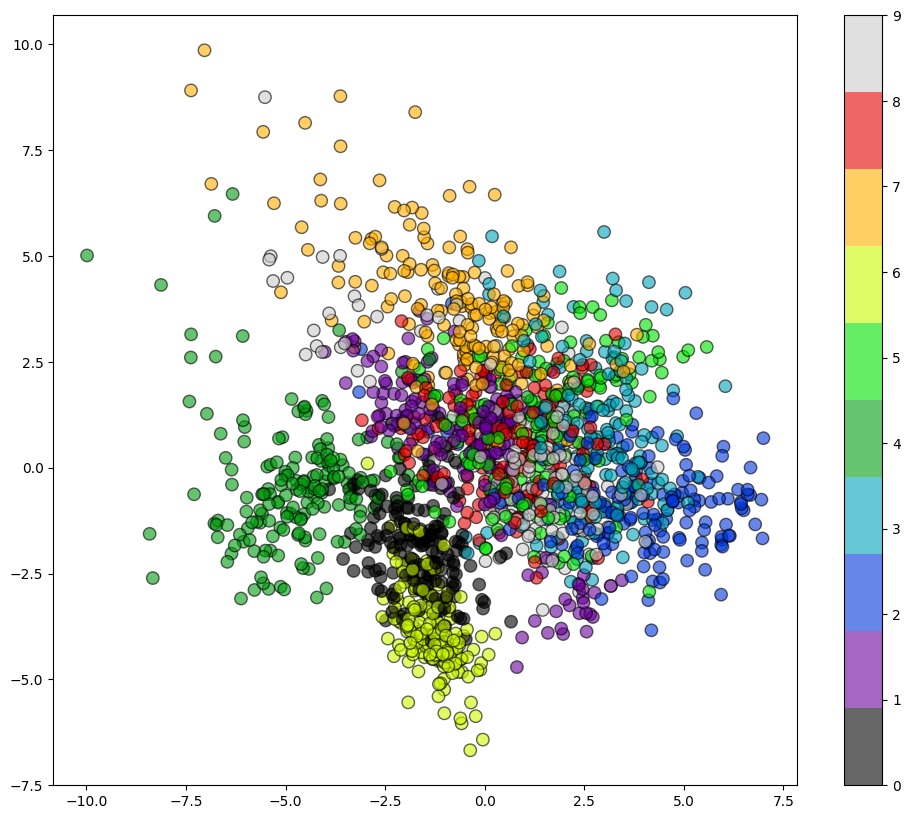

In [11]:
plt.figure(figsize=(12,10))
plt.scatter(x_reduzido[:,0],x_reduzido[:,1],c=y,edgecolors='black',alpha=0.6,s=80,cmap=plt.get_cmap('nipy_spectral',10))
plt.colorbar()

# TSA
Tem a mesma função que o o PCA, porém mais lento ,porém dependendo dos dados conseguimos visualizar de forma mais interessante. 

In [12]:
from sklearn.manifold import TSNE
tsne = TSNE(random_state=123)
x_tsne = tsne.fit_transform(x)

In [13]:
x_tsne.shape

(1797, 2)

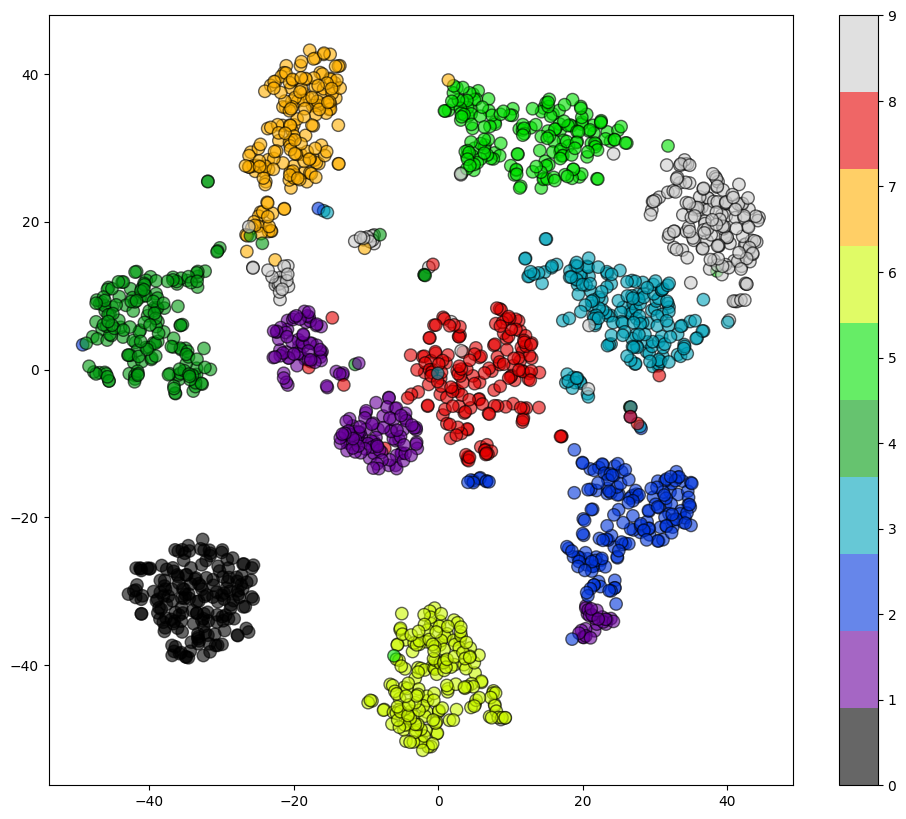

In [14]:
#gerar gráfico 
plt.figure(figsize=(12,10))
plt.scatter(x_tsne[:,0],x_tsne[:,1],c=y,edgecolors='black',alpha=0.6,s=80,cmap=plt.get_cmap('nipy_spectral',10))
plt.colorbar()

# PCA por percentual de integridade 

In [15]:
x.shape

(1797, 64)

In [16]:
x = StandardScaler().fit_transform(x)

In [17]:
#Manter 90% de integridade dos dados 
pca = PCA(0.90)

In [18]:
pca.fit(x)

PCA(n_components=0.9)

In [20]:
# revela quantos fitures deve ter para ter 90 % de integridade 
pca.n_components_ #31 dimensões

31

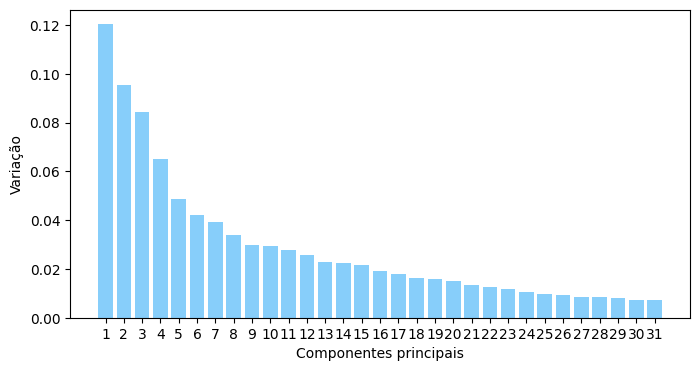

In [23]:
plt.figure(figsize=(8,4))
num_components = min(31, pca.n_components_)
plt.bar(np.arange(1,pca.n_components_+1),pca.explained_variance_ratio_[:num_components],color='lightskyblue')
plt.xlabel('Componentes principais')
plt.ylabel('Variação')
plt.xticks(np.arange(1,pca.n_components_+1))
plt.show()
           